In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [74]:
df = pd.read_csv('vgames2.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [76]:
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


## Project 문제 정의

### 배경
>박상영님은 게임 회사의 데이터 팀에 합류했습니다.

**다음 분기에 어떤 게임을 설계해야 할까**

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.
> https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

##Data Description

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

#### 0. 데이터 정제를 하시오

In [77]:
# 결측치는 년도에서 271개, 장르에서 50개, 배급사에 58개 발견견
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [78]:
# Unnamed: 0 컬럼 삭제
df = df.drop('Unnamed: 0', axis=1)

# Platform 정식 명칭으로 전환환
df.Platform = df.Platform.replace({'DS':'Nintendo DS', 'PS2':'PlayStation 2', 'PS3':'PlayStation 3', 'Wii':'Nintendo Wii ', 'X360':'Xbox 360', 'PSP':'PlayStation Portable',
                                   'PS':'PlayStation', 'PC':'pc', 'XB':'Xbox', 'GBA':'Game Boy Advance', 'GC':'GameCube', '3DS':'Nintendo 3DS', 'PSV':'PlayStation Vita',
                                   'PS4':'PlayStation 4', 'N64':'Nintendo 64', 'SNES':'Super Nintendo Entertainment System', 'XOne':'Xbox One', 'SAT':'Sega Saturn', 'WiiU':'Nintendo Wii U',
                                   '2600':'Atari 2600 ', 'GB':'Game Boy', 'NES':'Nintendo Entertainment System', 'DC':'Dreamcast', 'GEN':'Sega Genesis', 'NG':'Neo Geo',
                                   'SCD':'Sega CD', 'WS':'WonderSwan', '3DO':'3DO Interactive Multiplayer', 'TG16':'TurboGrafx-16', 'GG':'GameGear', 'PCFX ':'PC-FX'})

In [79]:
# 실수를 상징하는 .0을 제거한 뒤 0으로 네자리로 만듦
df.Year = df.Year.astype(str).str[:-2].str.pad(4, fillchar='0')
# 000n 데이터는 다시 Nan 값으로 변환환
df.Year = df.Year.replace('000n', np.nan)

In [80]:
# 결측치가 2% 미만이기 때문에 삭제 처리리
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Year           1.632727
Publisher      0.349440
Genre          0.301241
Name           0.000000
Platform       0.000000
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [81]:
# 결측치 삭제제
df = df.dropna()

In [82]:
# Year컬럼 특수 데이터 변경 (년도 앞에 빠진 부분 변경)
df.Year = df.Year.replace({'0009':'2009', '0097':'1997', '0011':'2011', '0015':'2015', '0003':'2003', '0096':'1996',
                                   '0006':'2006', '0008':'2008', '0001':'2001', '0005':'2005', '0004':'2004', '0010':'2010', '0098':'1998',
                                   '0007':'2007', '0016':'2016', '0086':'1986', '0014':'2014', '0095':'1995', '0002':'2002',
                                   '0013':'2013', '0000':'2000', '0012':'2012', '0094':'1994'})

In [83]:
# Year 데이터 확인
df['Year'].unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', '1995', '1993',
       '2012', '1987', '1982', '1994', '1990', '1992', '1991', '1983',
       '1988', '1981', '1989', '1986', '2017', '1980', '2020'],
      dtype=object)

In [84]:
# Year 데이터 타입 변경
df['Year'] = df['Year'].astype(int)

(array([ 107.,   65.,   89.,  443., 1264., 2428., 3874., 5237., 2388.,
         346.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <BarContainer object of 10 artists>)

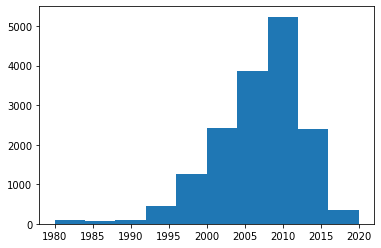

In [85]:
plt.hist(df['Year'], bins=10)
# 1995년 이전데이터와 2015년 이후 데이터 수가 적은 것을 확인할 수 있다. 정상적인 분석을 위해 데이터 수가 많지 않으면 제거 하고 진행한다. 

In [86]:
outlier = df[df['Year'] >= 2016]
len(outlier) / len(df)

0.02130410688996983

In [87]:
# 2018년 이후 자료 폐기 
df = df[df['Year'] < 2016]

In [88]:
outlier = df[df['Year'] <= 1990]
len(outlier) / len(df)

0.01384083044982699

In [89]:
# 1990년 이전 자료 폐기 
df = df[df['Year'] > 1989].reset_index(drop=True)

In [90]:
# 중복값 찾기
df[df.duplicated(['Name', 'Platform', 'Year', 'Genre', 'Publisher'],keep='first') == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8254,Madden NFL 13,PlayStation 3,2012,Sports,Electronic Arts,0,0.01,0,0


In [91]:
# 중복값 삭제
df = df.drop_duplicates(['Name', 'Platform', 'Year', 'Genre', 'Publisher'],keep='first').reset_index(drop=True)

In [92]:
df[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4577,Madden NFL 13,Xbox 360,2012,Sports,Electronic Arts,2.53,0.16,0,0.17
5000,Madden NFL 13,Nintendo Wii U,2012,Sports,Electronic Arts,0.22,0,0,0.02
6951,Madden NFL 13,PlayStation 3,2012,Sports,Electronic Arts,2.11,0.23,0,0.22
9006,Madden NFL 13,PlayStation Vita,2012,Sports,Electronic Arts,0.3,0,0,0.03
11350,Madden NFL 13,Nintendo Wii,2012,Sports,Electronic Arts,0.51,0,0,0.03


In [93]:
# 데이터 분석을 위해 멜트 함수를 써서 판매량을 각 데이터에서 Sales 데이터로 변환환
df1 = df.copy()

df1 = pd.melt(df1, id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher'
       ] ,value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='region', value_name='Sales')
df1.head()

,Name,Platform,Year,Genre,Publisher,region,Sales
0,Candace Kane's Candy Factory,Nintendo DS,2008,Action,Destineer,NA_Sales,0.04
1,The Munchables,Nintendo Wii,2009,Action,Namco Bandai Games,NA_Sales,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PlayStation Portable,2010,Adventure,Alchemist,NA_Sales,0
3,Deal or No Deal: Special Edition,Nintendo DS,2010,Misc,Zoo Games,NA_Sales,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation 3,2010,Platform,D3Publisher,NA_Sales,0.12


In [94]:
df2 = df1.sort_values(by=['Name', 'region']).reset_index()
df2 = df2.drop('index', axis=1)
df2.head(5)

,Name,Platform,Year,Genre,Publisher,region,Sales
0,'98 Koshien,PlayStation,1998,Sports,Magical Company,EU_Sales,0.1
1,'98 Koshien,PlayStation,1998,Sports,Magical Company,JP_Sales,0.12
2,'98 Koshien,PlayStation,1998,Sports,Magical Company,NA_Sales,0.15
3,'98 Koshien,PlayStation,1998,Sports,Magical Company,Other_Sales,0.03
4,.hack//G.U. Vol.1//Rebirth,PlayStation 2,2006,Role-Playing,Namco Bandai Games,EU_Sales,0


In [95]:
# Sales 0값 삭제제
df2 = df2.loc[df2.Sales != '0'].reset_index(drop=True)

In [96]:
# K 값은 0.001배 곱하고 M은 삭제제
def fix(x):
  if 'K' in x:
      return float(x[:-1])*0.001
  elif 'M' in x:
      return float(x[:-1])
  else:
      return float(x)

df2['Sales'] = df2['Sales'].apply(fix)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37527 entries, 0 to 37526
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       37527 non-null  object 
 1   Platform   37527 non-null  object 
 2   Year       37527 non-null  int64  
 3   Genre      37527 non-null  object 
 4   Publisher  37527 non-null  object 
 5   region     37527 non-null  object 
 6   Sales      37527 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ MB


In [98]:
df2.head()

,Name,Platform,Year,Genre,Publisher,region,Sales
0,'98 Koshien,PlayStation,1998,Sports,Magical Company,EU_Sales,0.10
1,'98 Koshien,PlayStation,1998,Sports,Magical Company,JP_Sales,0.12
2,'98 Koshien,PlayStation,1998,Sports,Magical Company,NA_Sales,0.15
3,'98 Koshien,PlayStation,1998,Sports,Magical Company,Other_Sales,0.03
4,.hack//G.U. Vol.1//Rebirth,PlayStation 2,2006,Role-Playing,Namco Bandai Games,JP_Sales,0.17


#### 1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

##### 지역은 어떻게 구분했나요?

In [27]:
df2.groupby('region')['Sales'].sum()

region
EU_Sales       2335.63
JP_Sales       1155.18
NA_Sales       4048.91
Other_Sales     768.48
Name: Sales, dtype: float64

지역은 데이터에 있는데로 북미, 유럽, 일본, 그외 지역으로 4가지로 구분하였다. 

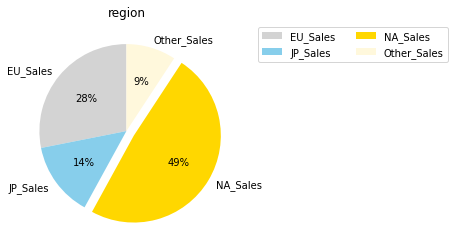

In [28]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
# 지역별 비율
ratio = df2.groupby('region')['Sales'].sum()

labels = ['EU_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']


plt.pie(ratio, labels=labels, autopct='%.0f%%', explode = (0,0,0.1,0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk'])
plt.title('region');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(2, 1))

 지역별 출고량을 기준으로 나누웠다. 북미 지역이 49%로 게임 출고량 비중이 제일 높았다. 

In [29]:
import plotly.express as px

In [30]:
p30 = df2.groupby(['region', 'Year'], as_index=False)['Sales'].sum()
fig = px.line(p30, x='Year', y='Sales', title='나라별 년출고량 데이터', color='region', markers=True, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

##### 지역별로 선호하는 게임의 장르를 파악했나요?

In [64]:
ratio7 = df2.groupby('Genre')['Sales'].sum()
ratio7

Genre
Action          1642.03
Adventure        227.45
Fighting         432.45
Misc             770.11
Platform         703.65
Puzzle           177.98
Racing           708.78
Role-Playing     879.47
Shooter          946.81
Simulation       388.09
Sports          1258.92
Strategy         172.46
Name: Sales, dtype: float64

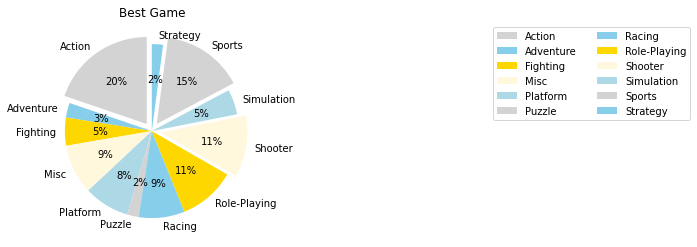

In [66]:
labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
plt.pie(ratio7, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0,0,0,0,0,0.1,0,0.1,0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(3, 1))

In [31]:
Nas = df2.loc[(df2.region == 'NA_Sales')]
Eus = df2.loc[(df2.region == 'EU_Sales')]
Jps = df2.loc[(df2.region == 'JP_Sales')]
Ots = df2.loc[(df2.region == 'Other_Sales')]

In [99]:
ratio

Genre
Action          814.98
Adventure        98.88
Fighting        215.23
Misc            391.16
Platform        370.25
Puzzle           77.89
Racing          347.55
Role-Playing    316.31
Shooter         516.20
Simulation      180.74
Sports          652.00
Strategy         67.72
Name: Sales, dtype: float64

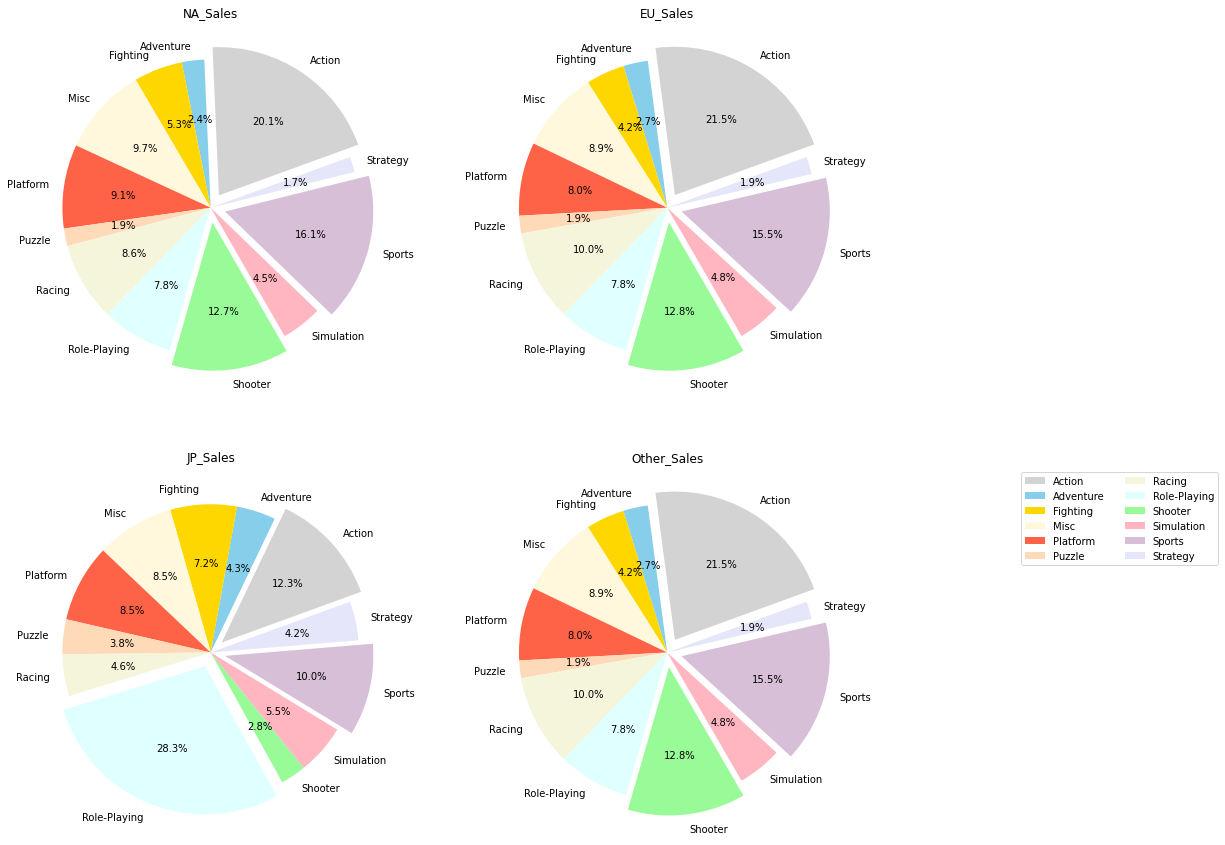

In [100]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

labels = ['Action', 'Adventure', 'Fighting ', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'tomato', 'peachpuff', 'beige', 'lightcyan', 'palegreen', 'lightpink', 'thistle', 'lavender']

ratio = df2.loc[(df2.region == 'NA_Sales')].groupby('Genre')['Sales'].sum()
ratio1 = df2.loc[(df2.region == 'EU_Sales')].groupby('Genre')['Sales'].sum()
ratio2 = df2.loc[(df2.region == 'JP_Sales')].groupby('Genre')['Sales'].sum()
ratio3 = df2.loc[(df2.region == 'Other_Sales')].groupby('Genre')['Sales'].sum()


fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0, 0].pie(ratio, labels=labels, autopct='%1.1f%%', startangle = 20, colors=colors, explode = (0.1,0,0,0,0,0,0,0,0.1,0,0.1,0))
ax[0, 1].pie(ratio1, labels=labels, autopct='%1.1f%%', startangle = 20, colors=colors, explode = (0.1,0,0,0,0,0,0,0,0.1,0,0.1,0))
ax[1, 0].pie(ratio2, labels=labels, autopct='%1.1f%%', startangle = 20, colors=colors, explode = (0.1,0,0,0,0,0,0,0.1,0,0,0.1,0))
ax[1, 1].pie(ratio1, labels=labels, autopct='%1.1f%%', startangle = 20, colors=colors, explode = (0.1,0,0,0,0,0,0,0,0.1,0,0.1,0))

ax[0, 0].set_title('NA_Sales')
ax[0, 1].set_title('EU_Sales')
ax[1, 0].set_title('JP_Sales')
ax[1, 1].set_title('Other_Sales')
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(2, 1))

plt.show()

도표에서도 나오는 것처럼 북미와 유럽, 기타지역은 스포츠가 1등이지만 일본 같은 경우 롤플레잉이 1등 장르로 나온다. 

##### 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

In [40]:
import scipy.stats as stats

In [ ]:
pip install pingouin

In [42]:
# 등분산성 검정
import pingouin as pg
pg.homoscedasticity(dv = 'Sales', group = 'region', data = df2)

,W,pval,equal_var
levene,249.985645,1.232318e-160,False


In [43]:
# 정규성 검정
Nas2 = df2[df2['region'] == 'NA_Sales'].Sales
Eus2 = df2[df2['region'] == 'EU_Sales'].Sales
Jps2 = df2[df2['region'] == 'JP_Sales'].Sales
Ots2 = df2[df2['region'] == 'Other_Sales'].Sales

li = [Nas2,Eus2,Jps2,Ots2]
for i in li:
  print(stats.shapiro(i))

ShapiroResult(statistic=0.3280905485153198, pvalue=0.0)
ShapiroResult(statistic=0.30082303285598755, pvalue=0.0)
ShapiroResult(statistic=0.38022732734680176, pvalue=0.0)
ShapiroResult(statistic=0.23777759075164795, pvalue=0.0)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



In [44]:
# statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Sales ~ C(region) * C(Genre)', df2).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,397.729947,132.576649,363.123093,1.713283e-232
C(Genre),11.0,82.099056,7.463551,20.442420,6.808851e-42
C(region):C(Genre),33.0,61.427039,1.861425,5.098383,5.350223e-20
Residual,37479.0,13683.624980,0.365101,NaN,NaN


In [ ]:
#이원원분산분석 결과 p-value가 0.05보다 작으므로로, 지역별 선호하는 게임 장르가 다르다라고 할 수 있다. 

#### 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [46]:
p30 = df2.groupby(['Platform', 'Year'], as_index=False)['Sales'].sum()
fig = px.line(p30, x='Year', y='Sales', title='Platform 트렌드', color='Platform', markers=True, color_discrete_sequence=px.colors.sequential.Turbo)

fig.show()

In [47]:
p30 = df2.groupby(['Platform', 'Year'], as_index=False)['Sales'].sum()
fig = px.bar(p30, x='Year', y='Sales', title='Platform 트렌드', color='Platform', color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [48]:
p30 = df2.groupby(['Genre', 'Year'], as_index=False)['Sales'].sum()
fig = px.line(p30, x='Year', y='Sales', title='장르 트렌드', color='Genre', markers=True, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [49]:
p30 = df2.groupby(['Genre', 'Year'], as_index=False)['Sales'].sum()
fig = px.bar(p30, x='Year', y='Sales', title='장르 트렌드', color='Genre', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

##### 트렌드는 어떤 것을 기준으로 파악했나요?

In [163]:
#트렌드는 장르별, 플렛폼별로 파악하였다. 

##### 연도별로 트렌드가 존재하나요?

In [163]:
#플렛폼은 년도별로 플레이스테이션이 출고량은 가장 많았고, 2010년대에 닌텐도가 주도를 하기도 하였다. 
# 장르멸로는 대부분 액션이 대부분을 차지하고 있다. 

##### 왜 존재한다/존재하지 않는다고 생각했나요?

In [50]:
model = ols('Sales ~ C(Year) * C(Platform)', df2).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Year),25.0,99.624042,3.984962,10.928337,2.062447e-43
C(Platform),29.0,267.330117,9.218280,25.280160,3.195251e-134
C(Year):C(Platform),725.0,284.907862,0.392976,1.077696,7.422926e-02
Residual,37319.0,13608.180619,0.364645,NaN,NaN


In [51]:
model = ols('Sales ~ C(Year) * C(Genre)', df2).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Year),25.0,99.624042,3.984962,10.736117,1.834598e-42
C(Genre),11.0,85.081288,7.734663,20.838404,8.527372e-43
C(Year):C(Genre),275.0,225.156327,0.818750,2.205843,1.003374e-26
Residual,37220.0,13815.076051,0.371173,NaN,NaN


#### 3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [52]:
df_b= df2.sort_values(by="Sales", ascending=False).groupby('Name')['Sales'].sum().nlargest(5)
fig = px.bar(df_b, title='최고 매출 게임')
fig.show()


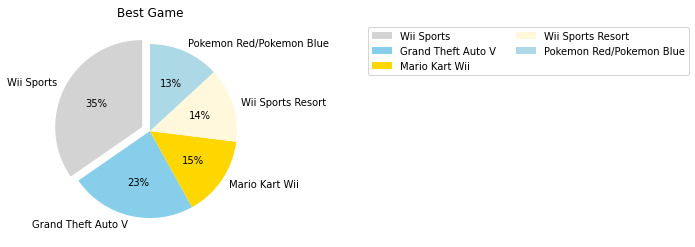

In [53]:
labels = ['Wii Sports', 'Grand Theft Auto V', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue']
plt.pie(df_b, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(3, 1))

In [54]:
df2[df2['Name'] == 'Wii Sports']

,Name,Platform,Year,Genre,Publisher,region,Sales
36092,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,EU_Sales,29.02
36093,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,JP_Sales,3.77
36094,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,NA_Sales,41.49
36095,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,Other_Sales,8.46


In [55]:
game_NA = df2.loc[(df2.region == 'NA_Sales')].sort_values(by="Sales", ascending=False).groupby('Name')['Sales'].sum().nlargest(5)
game_EU = df2.loc[(df2.region == 'EU_Sales')].sort_values(by="Sales", ascending=False).groupby('Name')['Sales'].sum().nlargest(5)
game_JP = df2.loc[(df2.region == 'JP_Sales')].sort_values(by="Sales", ascending=False).groupby('Name')['Sales'].sum().nlargest(5)
game_OT = df2.loc[(df2.region == 'Other_Sales')].sort_values(by="Sales", ascending=False).groupby('Name')['Sales'].sum().nlargest(5)

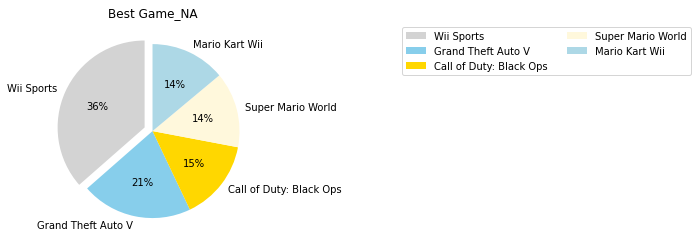

In [56]:
labels = ['Wii Sports', 'Grand Theft Auto V', 'Call of Duty: Black Ops', 'Super Mario World', 'Mario Kart Wii']
plt.pie(game_NA, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game_NA');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(3, 1))

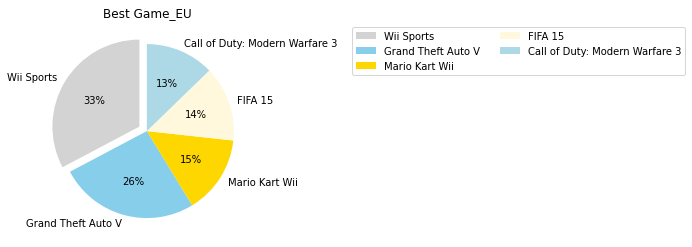

In [57]:
labels = ['Wii Sports', 'Grand Theft Auto V', 'Mario Kart Wii', 'FIFA 15', 'Call of Duty: Modern Warfare 3']
plt.pie(game_EU, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game_EU');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(3, 1))

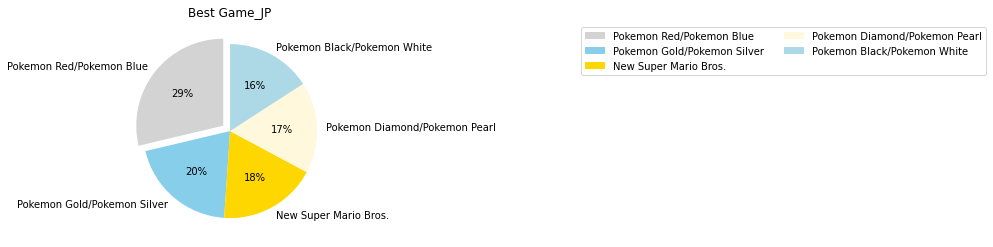

In [58]:
labels = ['Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', 'New Super Mario Bros.', 'Pokemon Diamond/Pokemon Pearl', 'Pokemon Black/Pokemon White']
plt.pie(game_JP, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game_JP');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(4, 1))

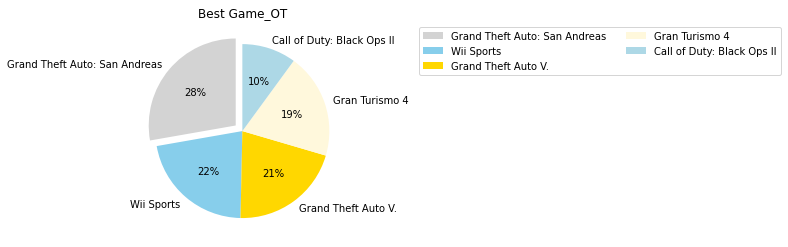

In [60]:
labels = ['Grand Theft Auto: San Andreas', 'Wii Sports', 'Grand Theft Auto V.', 'Gran Turismo 4', 'Call of Duty: Black Ops II']
plt.pie(game_OT, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Game_OT');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(3, 1))

In [61]:
df_b= df2.sort_values(by="Sales", ascending=False).groupby('Genre')['Sales'].sum().nlargest(10)
fig = px.bar(df_b, title='최고 매출 게임장르')
fig.show()

In [99]:
df_b= df2.sort_values(by="Sales", ascending=False).groupby('Platform')['Sales'].sum().nlargest(10)
fig = px.bar(df_b, title='최고 매출 플렛폼')
fig.show()

In [38]:
game_bt = df2.groupby('Platform')['Sales'].sum().nlargest(5)
game_bt

Platform
PlayStation 2    1222.44
Xbox 360          967.76
PlayStation 3     944.18
Nintendo Wii      900.15
Nintendo DS       816.88
Name: Sales, dtype: float64

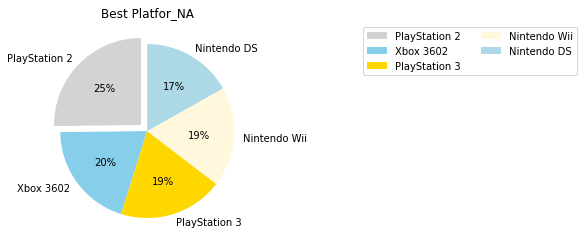

In [39]:
labels = ['PlayStation 2', 'Xbox 3602', 'PlayStation 3', 'Nintendo Wii', 'Nintendo DS']
plt.pie(game_bt, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Platfor_NA');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(2.5, 1))

In [67]:
game_NA2 = df2.loc[(df2.region == 'NA_Sales')].sort_values(by="Sales", ascending=False).groupby('Platform')['Sales'].sum().nlargest(5)
game_EU2 = df2.loc[(df2.region == 'EU_Sales')].sort_values(by="Sales", ascending=False).groupby('Platform')['Sales'].sum().nlargest(5)
game_JP2 = df2.loc[(df2.region == 'JP_Sales')].sort_values(by="Sales", ascending=False).groupby('Platform')['Sales'].sum().nlargest(5)
game_OT2 = df2.loc[(df2.region == 'Other_Sales')].sort_values(by="Sales", ascending=False).groupby('Platform')['Sales'].sum().nlargest(5)

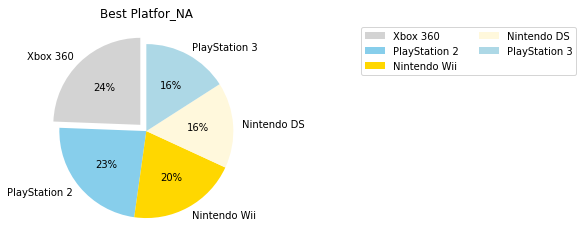

In [68]:
labels = ['Xbox 360', 'PlayStation 2', 'Nintendo Wii', 'Nintendo DS', 'PlayStation 3']
plt.pie(game_NA2, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Platfor_NA');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(2.5, 1))

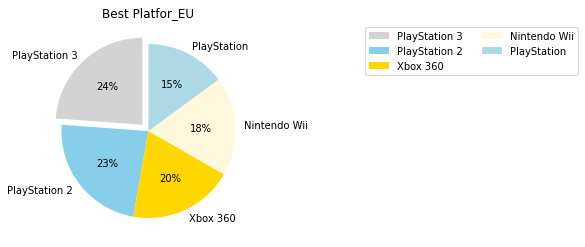

In [69]:
labels = ['PlayStation 3', 'PlayStation 2', 'Xbox 360', 'Nintendo Wii', 'PlayStation']
plt.pie(game_EU2, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Platfor_EU');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(2.5, 1))

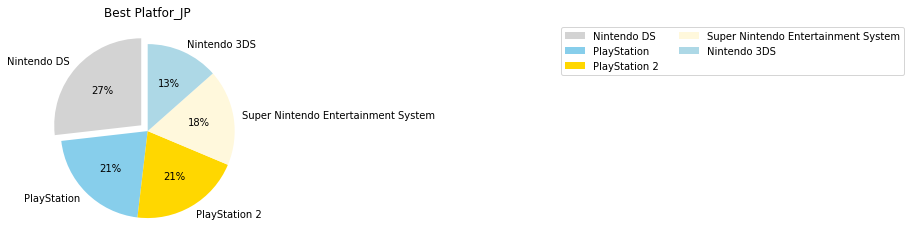

In [70]:
labels = ['Nintendo DS', 'PlayStation', 'PlayStation 2', 'Super Nintendo Entertainment System', 'Nintendo 3DS']
plt.pie(game_JP2, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Platfor_JP');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(4, 1))

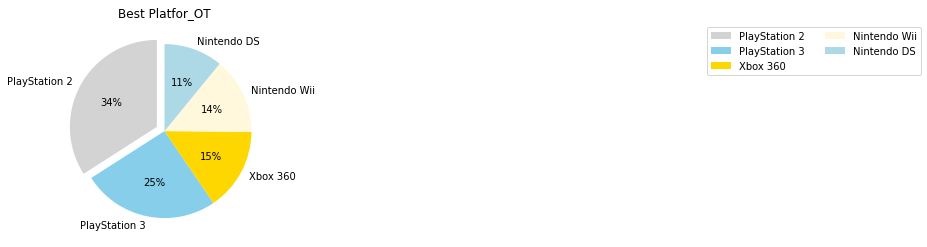

In [71]:
labels = ['PlayStation 2', 'PlayStation 3', 'Xbox 360', 'Nintendo Wii', 'Nintendo DS']
plt.pie(game_OT2, labels=labels, autopct='%.0f%%', explode = (0.1,0,0,0, 0), startangle = 90, colors=['lightgrey', 'skyblue', 'gold','cornsilk', 'lightblue'])
plt.title('Best Platfor_OT');
plt.legend(loc='upper right',  ncol=2, bbox_to_anchor=(4, 1))

##### 인기가 많다는 것을 어떻게 정의했나요?

In [163]:
#인기가 많다는 것은 출고량을 통하여 정의하였다. 

##### 해당 게임이 왜 인기가 많다고 생각했나요?

In [163]:
#스포츠가 트렌드였던 시기이기도 하고 닌텐도 WII가 새로 출시되면서 큰 호황을 같이 누렸다. 

##### 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?

In [163]:
#트렌드 및 장르를 구분하여 특정 트렌드가 나타나는지 확인하고자 하였다. 

##### 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

In [163]:
#각 국가별 선호하는 플렛폼은 각기 다르지만 선호하는 장르에서는 일본을 제외하고는 동일하였다. 
#또 트렌드로는 새로운 플렛폼 기기가 나오면서 트렌드가 변화하는 것이 나타났다. 

#### 4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.
더불어 유의미한 인사이트를 도출하기 위해서는

- 다음 분기가 언제인지
- 회사의 규모는 어느정도인지

와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.
위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [163]:
#분석자료는 2015년까지의 자료를 바탕으로 분석하여 다음 분석시기는 2016이고, 플렛폼은 2013년도에 출시되어 급격히 출고량이 올라가고 있는 플레이스테이션 4로 선정하였다. 
# 지역은 북미부터 시작하여 유럽, 일본, 그외 지역으로 출시하며, 장르는 액션이 감소추세인 것을 감안하여 새롭게 뜨고 있는 Shooter 장르로 선택하였다. 